# Processing of the domain insertion data and analysis with respect to insert position
- Inputs were DI datasets as they are produced by the Dipseq library

In [1]:
#import packages
import pandas as pd 
import numpy as np
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
from Bio import SeqIO
import warnings
warnings.filterwarnings(action='once')

from utils.plotting import *
from utils.processing import *



/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


### Define inputs
- infolder should contain the input CSVs. Rawdata is available via Zonedo and can be processed via the [dipSeq pipeline](https://github.com/SavageLab/dipseq) 

In [2]:

base = '/work/projects/project01640/jm/domain_insertion/DI_screen'
in_folder = f'{base}/analysis/input_data'
out_folder = f'{base}/analysis'
prot_dict = {rec.id : rec.seq for rec in SeqIO.parse(f'{in_folder}/proteins.fasta', 'fasta')}
samples = ['AraC_ERD', 'AraC_eYFP', 'AraC_LOV', 'AraC_PDZ', 'AraC_UniRapR', 'Flp_PDZ', 'SigF_PDZ', 'TVMV_PDZ']



### Plot individual replicates versus input

In [12]:
# functions
def process_enriched(input_enriched):
    data_cond = pd.read_csv(input_enriched, delimiter=',')
    data_cond.insertion_site = data_cond.insertion_site/3
    data_cond['insertion_site'] = data_cond['insertion_site']-1 #remove linker S after M
    data_cond = data_cond.loc[(data_cond['in_frame_insertion'] == True) & (data_cond['forward_insertion'] == True) & 
                            (data_cond['linker_seq'].isnull())]
    data_norm = pd.DataFrame([data_cond['insertion_site'].value_counts(), data_input['insertion_site'].value_counts(), 
    pd.RangeIndex(1, len(prot_dict[combination.split('_')[0]])+1).to_series()]).T
    data_norm.index = data_norm.index.astype(int)
    data_norm.columns = ['cond', 'input', 'position']
    data_norm['cond'] = data_norm['cond']/np.sum(data_norm['cond'])
    data_norm['input'] = data_norm['input']/np.sum(data_norm['input'])
    data_norm['norm'] = data_norm['cond']/data_norm['input']
    data_norm['position'] = data_norm.index.astype(str)
    data_norm.fillna(0, inplace=True)
    data_norm = data_norm[data_norm.index >= 0]
    data_norm = data_norm[data_norm.index < len(prot_dict[combination.split('_')[0]])+1]
    data_norm['log'] = np.log2(data_norm['norm'])
    data_norm.loc[data_norm.input == 0, 'log'] = np.nan
    data_norm.loc[data_norm.log == -np.inf, 'log'] = -10
    return data_norm

def create_hist(data, reps, combination, out_folder):
    plt.clf()
    plt.figure(figsize=(10,3.5))
    sns.set_context(rc = {'patch.linewidth': 0.0}) 
    ax = sns.histplot(data=data, x='insertion_site', discrete=True, shrink=1, color='#808080')
    plt.xlim(left=0.5, right=len(prot_dict[combination.split('_')[0]]))
    plt.title(f"{combination.replace('_', ' ')}")
    plt.yscale('log')
    plt.ylabel("Log read counts")
    plt.xlabel("Insertion site")
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.yaxis.set_tick_params(width=2, which='both')
    ax.xaxis.set_tick_params(width=2)
    sns.despine()
    plt.savefig(f"{out_folder}/figure/input_coverage_{combination}_input.svg")


/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

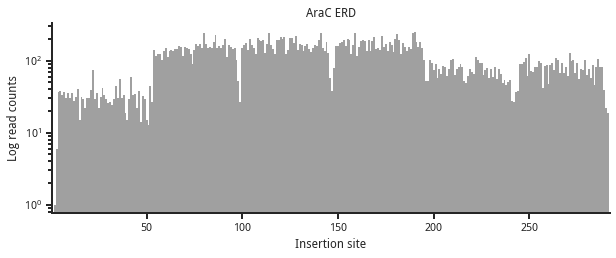

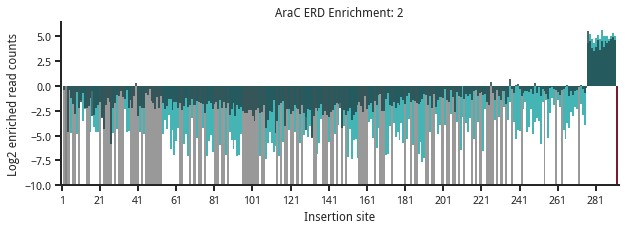

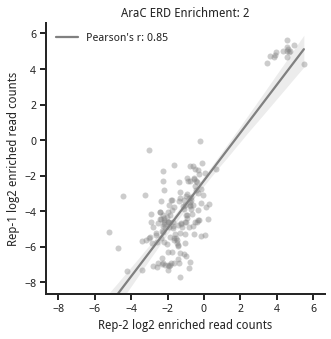

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/ipykernel_launcher.py:19: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.


<Figure size 432x288 with 0 Axes>

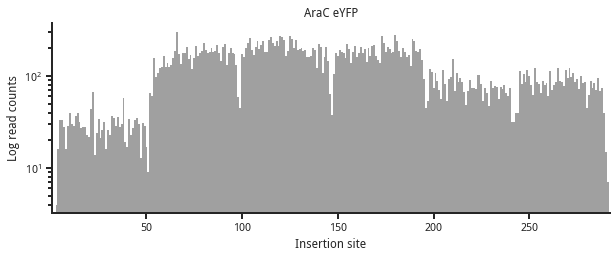

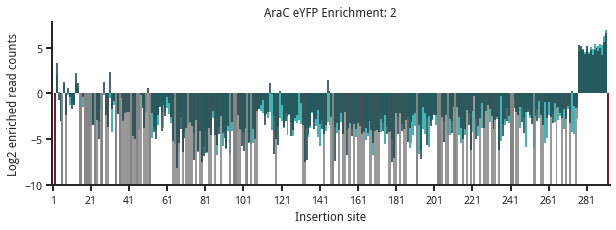

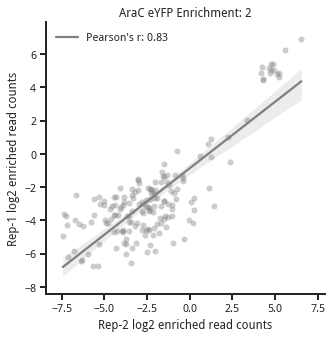

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

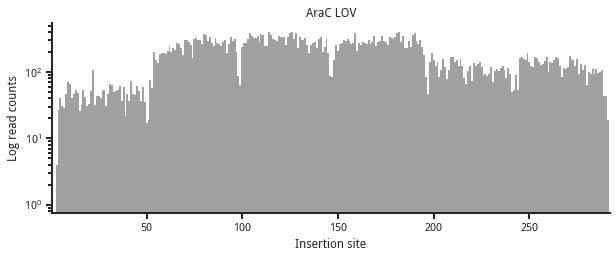

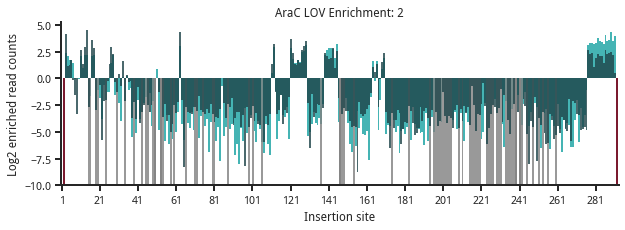

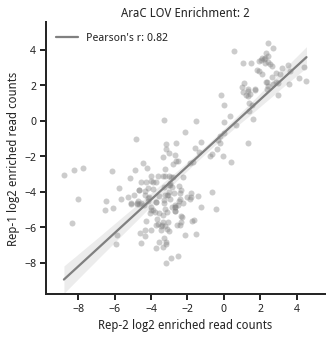

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


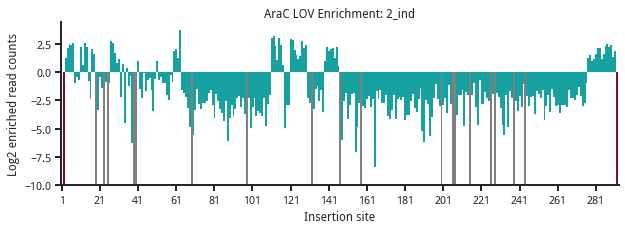

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

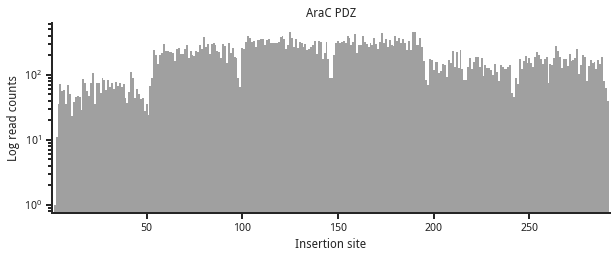

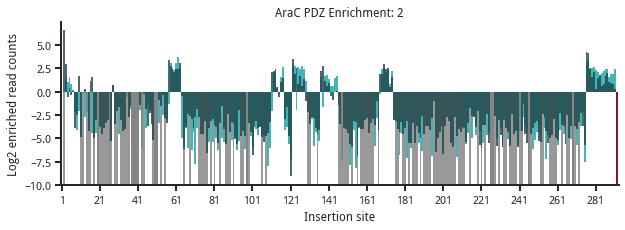

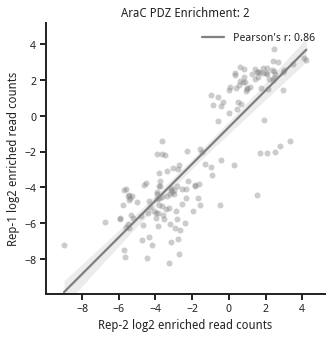

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  
/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

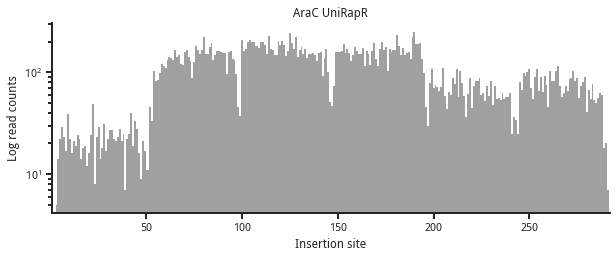

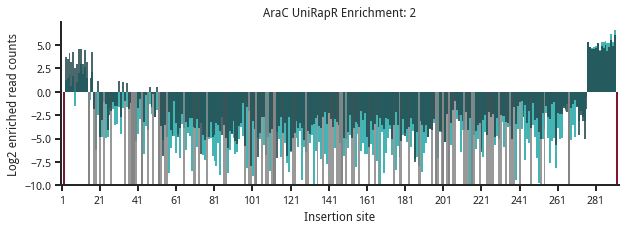

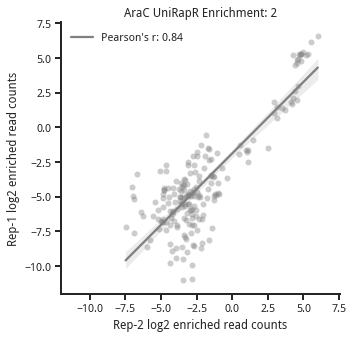

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/ipykernel_launcher.py:14: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  
/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

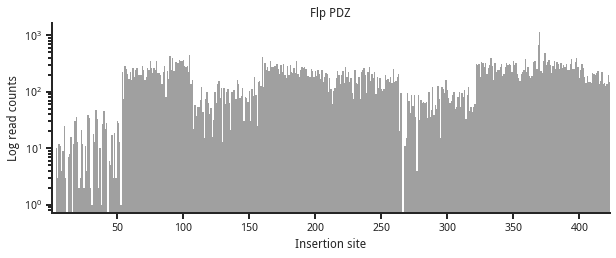

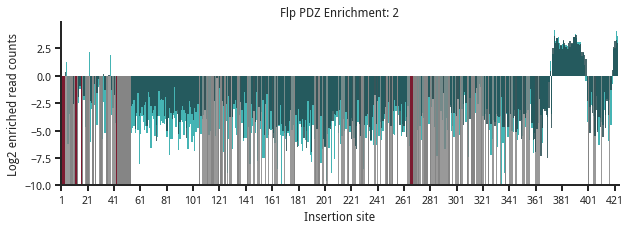

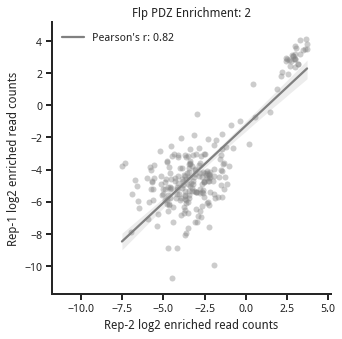

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  
/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/ipykernel_launcher.py:19: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.


<Figure size 432x288 with 0 Axes>

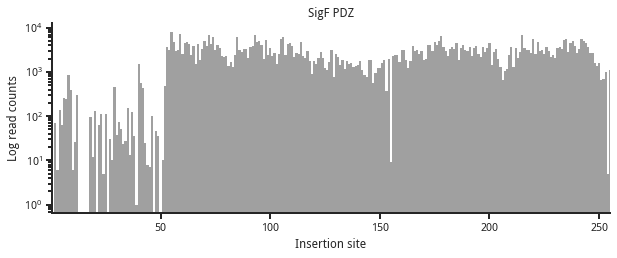

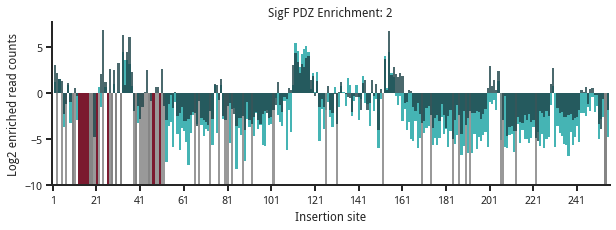

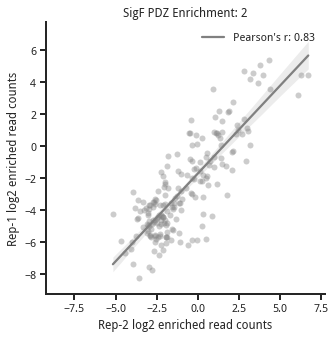

/home/jm38sywy/miniconda3/envs/dipseq/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 432x288 with 0 Axes>

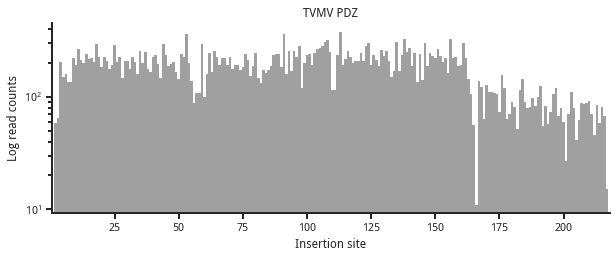

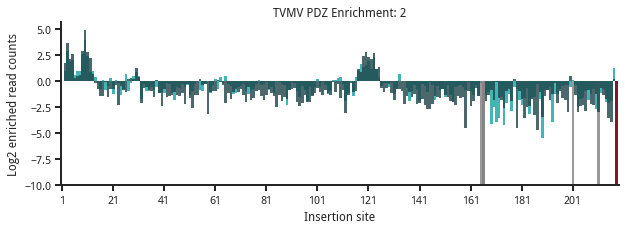

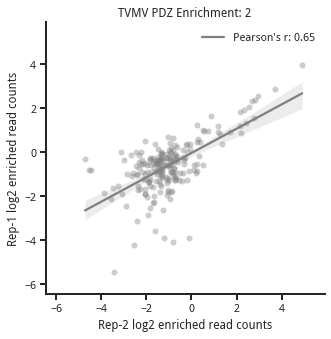

In [13]:
samples_dict = {}
for combination in samples:
        samples_dict[combination] = {}
        for condition in ['input', ['12','22'], ['22_ind']]:   
            if condition == 'input':
                try:
                    reps=False
                    data_input = process_input(f"{in_folder}/{combination}_{condition}_combined.csv")
                    create_hist(data_input, reps, combination, out_folder)
                except:
                    pass         
            else:
                try:
                    data_norm_1 = process_enriched(f"{in_folder}/{combination}_{condition[0]}_combined.csv")
                    samples_dict[combination][condition[0]] = data_norm_1
                except:
                    data_norm_1 = 'empty'
                try:
                    data_norm_2 = process_enriched(f"{in_folder}/{combination}_{condition[1]}_combined.csv")
                    samples_dict[combination][condition[1]] = data_norm_2
                except:
                    data_norm_2 = 'empty'
                if type(data_norm_1) != str or type(data_norm_2) != str:
                    create_enrichment_fig(data_norm_1, data_norm_2, combination, condition, prot_dict, out_folder)
                #try:
                if condition[0][1:] == '2':
                    data_norm = pd.DataFrame([data_norm_1['log'], data_norm_2['log']], index=['Replicate-1', 'Replicate-2'])
                    data_norm.replace(-10, np.nan, inplace=True)
                    data_norm.dropna(inplace=True, axis='columns')
                    correlation_plot(data_norm.T, combination, condition, out_folder)
                    del data_norm


with open(f'{out_folder}/output_datasets/analysis_dict.pickle', 'wb') as f:
    pkl.dump(samples_dict, f)
f.close()
         


Int64Index([1, 2, 29, 60, 61, 62, 113, 114, 115, 116, 164, 166, 169, 170, 292], dtype='int64')


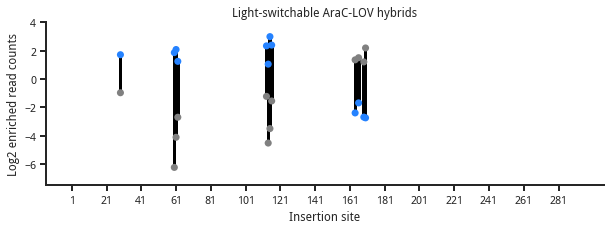

In [6]:
sns.set(font_scale = 1)
sns.set_style("ticks", rc={'font.family':'sans-serif', 'font.sans-serif':'Droid Sans'})


    
LOV_switching = pd.DataFrame([(samples_dict['AraC_LOV']['12']['log'] + samples_dict['AraC_LOV']['22']['log'])/2, samples_dict['AraC_LOV']['22_ind']['log']]).T
LOV_switching.columns = ['dark', 'light']

for idx, row in LOV_switching.iterrows():
    if row[0] < 1 and row[1] < 1:
        LOV_switching.iloc[idx-1,:] = [0,0]
    if abs(row[0] - row[1]) < 2.5:
        LOV_switching.iloc[idx-1,:] = [0,0]

score = LOV_switching['dark']-LOV_switching['light']

LOV_switching['position'] = LOV_switching.index
print(LOV_switching[LOV_switching['dark'] != 0].index)
create_switch_fig(LOV_switching, out_folder)



Fold change ranling: 
60    -8.095273
115   -6.484597
30    -6.444093
61    -6.189467
114   -5.564962
117   -4.537598
62    -3.940978
116   -3.940976
113   -3.5617902
79    1.843357
3      2.012278
166    3.185385
164    3.742526
169    3.893907
170    4.928636
165    8.614192


## Correlation plot and fold change plots


In [7]:
conditions = ['12', '22', '12_ind', '22_ind']
norm_dict = {}
for j in ['ERD', 'PDZ', 'UniRapR', 'eYFP', 'LOV']:
    for name, df in samples_dict[f'AraC_{j}'].items():
        norm_dict[f'{j} {name[0]}{name[2:]}'] = df.log.to_list()

norm_df = pd.DataFrame.from_dict(norm_dict).iloc[1:-1,:]
norm_df_small = pd.DataFrame([(norm_df['ERD 1']+norm_df['ERD 2'])/2, (norm_df['PDZ 1']+norm_df['PDZ 2'])/2, 
                (norm_df['UniRapR 1']+norm_df['UniRapR 2'])/2, (norm_df['eYFP 1']+norm_df['eYFP 2'])/2, (norm_df['LOV 1']+norm_df['LOV 2'])/2, norm_df['LOV 2_ind']]).T
norm_df_small.columns = ['ERD', 'PDZ', 'UniRapR', 'eYFP', 'LOV', 'LOV_ind']

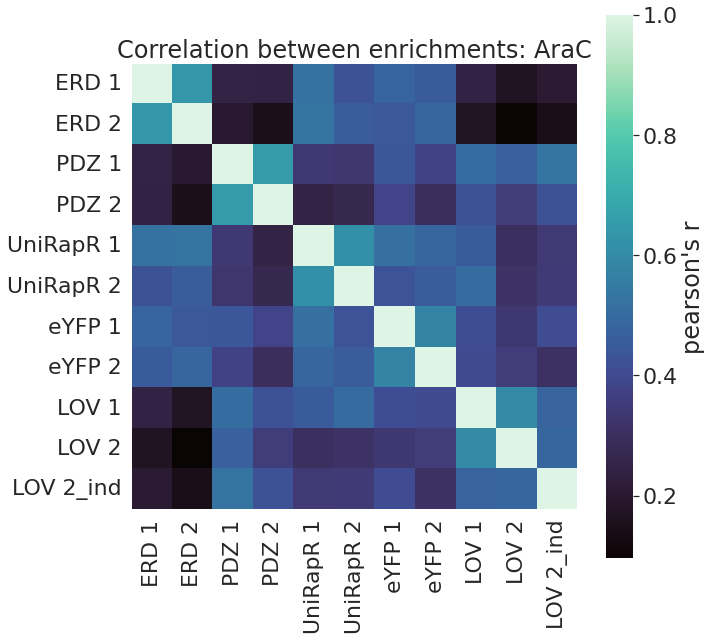

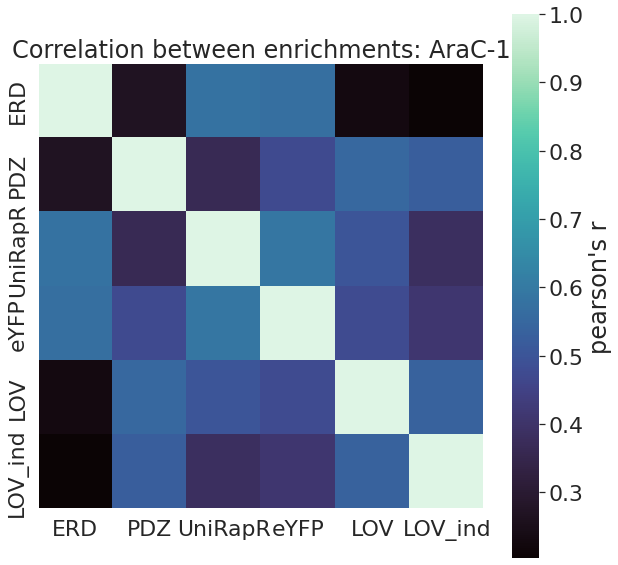

In [8]:
pairwise_correlation(norm_df, 'AraC', out_folder)
pairwise_correlation(norm_df_small, 'AraC-1', out_folder)

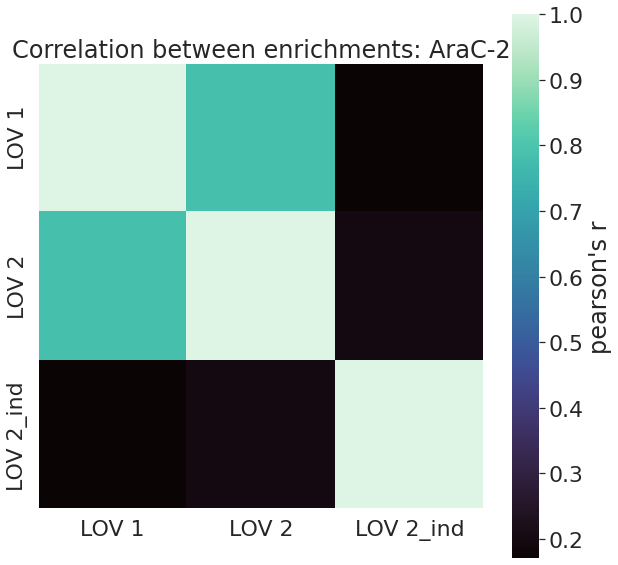

In [9]:
# only take samples into account that are >0 in at least one dataset
conditions = ['12', '22', '12_ind', '22_ind']
for j in ['LOV']:
    norm_dict = {}
    for name, df in samples_dict[f'AraC_{j}'].items():
        norm_dict[f'{j} {name[0]}{name[2:]}'] = df.log.to_list()
    norm_df = pd.DataFrame.from_dict(norm_dict).iloc[1:-1,:]
    pairwise_correlation(norm_df[(norm_df > 0).any(axis=1)], 'AraC-2', out_folder)

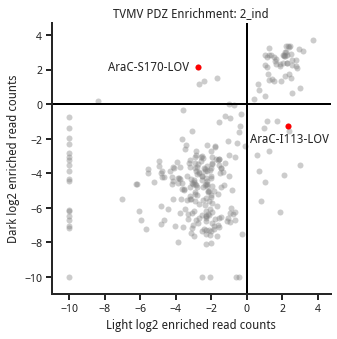

In [10]:

LOV_switching = pd.DataFrame([(samples_dict['AraC_LOV']['12']['log'] + samples_dict['AraC_LOV']['22']['log'])/2, samples_dict['AraC_LOV']['22_ind']['log']]).T
LOV_switching.columns = ['Dark', 'Light']
LOV_switching = LOV_switching.iloc[1:-1,:]
sns.set(font_scale = 1)
sns.set_style("ticks", rc={'font.family':'sans-serif', 'font.sans-serif':'Droid Sans'})
plt.figure(figsize=(5,5))
plt.rcParams['axes.linewidth'] = 2
ax = sns.scatterplot(data=LOV_switching, x='Light', y='Dark', color='grey', alpha=.4, linewidth=0, legend=False)
ax1 = sns.scatterplot(data=LOV_switching.iloc[[111,168],:], x='Light', y='Dark', color='red', alpha=1, linewidth=0, legend=False)
plt.xlabel("Light log2 enriched read counts")
plt.ylabel("Dark log2 enriched read counts")
plt.xlim(LOV_switching.min().min()-1, LOV_switching.max().max() +1)
plt.ylim(LOV_switching.min().min()-1, LOV_switching.max().max() +1)
sns.despine()
plt.axvline(0, 1,0, color='black', linewidth=2)
plt.axhline(0, 1,0, color='black', linewidth=2)
ax.annotate('AraC-I113-LOV', (.2, -2.2))
ax.annotate('AraC-S170-LOV', (-7.8, 1.95))
plt.title(f"{combination.replace('_', ' ')} Enrichment: {condition[0][1:]}")
ax.yaxis.set_tick_params(width=2)
ax.xaxis.set_tick_params(width=2)
plt.savefig(f"{out_folder}/figures/LOV_scatter_{combination}_{condition[0][1:]}.svg")
